## Download data

In [1]:
# imports required for the whole script to run
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
import seaborn as sn

In [2]:
mushrooms = pd.read_csv('https://github.com/dnkolzeev/mushROOM/raw/main/mushrooms.csv')

## Data preparation

In [3]:
def df_preliminary_proc(df):

    # rename the columns
    df.columns = ['classes', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
                         'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
                         'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
                         'stalk_surface_below_ring', 'stalk_color_above_ring',
                         'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
                         'ring_type', 'spore_print_color', 'population', 'habitat']

    # Drop unclear columns:
    df = df.drop(['odor', 'gill_size', 'veil_type', 'spore_print_color'], axis = 1)

    # replace '?' sign as a value
    df['stalk_root'] = df['stalk_root'].str.replace('?', 'm')

    #replace letters with meaningfull words:

    classes = {'edible': 'e', 'poisonous': 'p'}
    cap_shape = {'bell': 'b', 'conical': 'c', 'convex': 'x', 'flat': 'f', 'knobbed': 'k', 'sunken': 's'}
    cap_surface = {'fibrous': 'f', 'grooves': 'g', 'scaly': 'y', 'smooth': 's'}
    cap_color = {'brown': 'n', 'buff': 'b', 'cinnamon': 'c', 'gray': 'g', 'green': 'r', 
                 'pink': 'p', 'purple': 'u', 'red': 'e', 'white': 'w', 'yellow': 'y'}
    bruises = {'yes': 't', 'no': 'f'}
    gill_attachment = {'attached': 'a', 'descending': 'd', 'free': 'f', 'notched': 'n'}
    gill_spacing = {'close': 'c', 'crowded': 'w', 'distant': 'd'}
    gill_color = {'black': 'k', 'brown': 'n', 'buff': 'b', 'chocolate': 'h', 'gray': 'g', 'green': 'r', 
                  'orange': 'o', 'pink': 'p', 'purple': 'u', 'red': 'e', 'white': 'w', 'yellow': 'y'}
    stalk_shape = {'enlarging': 'e', 'tapering': 't'}
    stalk_root = {'bulbous': 'b', 'club': 'c', 'cup': 'u', 'equal': 'e', 'rhizomorphs': 'z', 'rooted': 'r', 
                  'missing': 'm'}
    stalk_surface_above_ring = {'fibrous': 'f', 'scaly': 'y', 'silky': 'k', 'smooth': 's'}
    stalk_surface_below_ring = {'fibrous': 'f', 'scaly': 'y', 'silky': 'k', 'smooth': 's'}
    stalk_color_above_ring = {'brown': 'n', 'buff': 'b', 'cinnamon': 'c', 'gray': 'g', 'orange': 'o', 
                              'pink': 'p', 'red': 'e', 'white': 'w', 'yellow': 'y'}
    stalk_color_below_ring = {'brown': 'n', 'buff': 'b', 'cinnamon': 'c', 'gray': 'g', 'orange': 'o', 
                              'pink': 'p', 'red': 'e', 'white': 'w', 'yellow': 'y'}
    veil_color = {'brown': 'n', 'orange': 'o', 'white': 'w', 'yellow': 'y'}
    ring_number = {'none': 'n', 'one': 'o', 'two': 't'}
    ring_type = {'cobwebby': 'c', 'evanescent': 'e', 'flaring': 'f', 
                 'large': 'l', 'none': 'n', 'pendant': 'p', 'sheathing': 's', 'zone': 'z'}
    population = {'abundant': 'a', 'clustered': 'c', 'numerous': 'n', 'scattered': 's', 
                  'several': 'v', 'solitary': 'y'}
    habitat = {'grasses': 'g', 'leaves': 'l', 'meadows': 'm', 'paths': 'p', 'urban': 'u', 
               'waste': 'w', 'woods': 'd'}


    dict_list = [classes, cap_shape, cap_surface, cap_color, bruises,
           gill_attachment, gill_spacing, gill_color,
           stalk_shape, stalk_root, stalk_surface_above_ring,
           stalk_surface_below_ring, stalk_color_above_ring,
           stalk_color_below_ring, veil_color, ring_number, ring_type, population, habitat]

    dict_list_rev = []
    for i in dict_list:
        new_dict = dict([(value, key) for key, value in i.items()])
        dict_list_rev.append(new_dict)

    for i in range(0,19):
        df.iloc[:, i] = df.iloc[:, i].apply(lambda row: dict_list_rev[i][row])


    return df

In [4]:
def df_final_proc(df):
    
    classes = {'edible': True, 'poisonous': False}
    cap_shape = {'bell': 1, 'conical': 2, 'convex': 3, 'flat': 4, 'knobbed': 5, 'sunken': 6}
    cap_surface = {'fibrous': 1, 'grooves': 2, 'scaly': 3, 'smooth': 4}
    cap_color = {'brown': 1, 'buff': 2, 'cinnamon': 3, 'gray': 4, 'green': 5, 'pink': 6, 'purple': 7, 
                 'red': 8, 'white': 9, 'yellow': 10}
    bruises = {'yes': 1, 'no': 0}
    gill_attachment = {'attached': 1, 'descending': 2, 'free': 3, 'notched': 4}
    gill_spacing = {'close': 1, 'crowded': 2, 'distant': 3}
    gill_color = {'black': 1, 'brown': 2, 'buff': 3, 'chocolate': 4, 'gray': 5, 'green': 6, 
                  'orange': 7, 'pink': 8, 'purple': 9, 'red': 10, 'white': 11, 'yellow': 12}
    stalk_shape = {'enlarging': 1, 'tapering': 2}
    stalk_root = {'bulbous': 1, 'club': 2, 'cup': 3, 'equal': 4, 'rhizomorphs': 5, 'rooted': 6, 
                  'missing': 0}
    stalk_surface_above_ring = {'fibrous': 1, 'scaly': 2, 'silky': 3, 'smooth': 4}
    stalk_surface_below_ring = {'fibrous': 1, 'scaly': 2, 'silky': 3, 'smooth': 4}
    stalk_color_above_ring = {'brown': 1, 'buff': 2, 'cinnamon': 3, 'gray': 4, 'orange': 5, 
                              'pink': 6, 'red': 7, 'white': 8, 'yellow': 9}
    stalk_color_below_ring = {'brown': 1, 'buff': 2, 'cinnamon': 3, 'gray': 4, 'orange': 5, 
                              'pink': 6, 'red': 7, 'white': 8, 'yellow': 9}
    veil_color = {'brown': 1, 'orange': 2, 'white': 3, 'yellow': 4}
    ring_number = {'none': 0, 'one': 1, 'two': 2}
    ring_type = {'cobwebby': 1, 'evanescent': 2, 'flaring': 3, 'large': 4, 
                 'none': 5, 'pendant': 6, 'sheathing': 7, 'zone': 8}
    population = {'abundant': 1, 'clustered': 2, 'numerous': 3, 'scattered': 4, 'several': 5, 'solitary': 6}
    habitat = {'grasses': 1, 'leaves': 2, 'meadows': 3, 'paths': 4, 'urban': 5, 'waste': 6, 'woods': 7}




    dict_list = [classes, cap_shape, cap_surface, cap_color, bruises, 
           gill_attachment, gill_spacing,  gill_color,
           stalk_shape, stalk_root, stalk_surface_above_ring,
           stalk_surface_below_ring, stalk_color_above_ring,
           stalk_color_below_ring, veil_color, ring_number, ring_type, population, habitat]

    for i in range(0,19):
        df.iloc[:, i] = df.iloc[:, i].apply(lambda row: dict_list[i][row])


    return df, dict_list

In [5]:
df_proc = df_preliminary_proc(mushrooms)
df, dict_list = df_final_proc(df_proc)

### Little summary
Features that are unbiguous or too specific for the ordinary person to determine were removed to ensure easier usability of our app. Overall, we ended up with 18 categorial predictors and 1 boolean predicted variable - 'classes'

## Exploratory Analysis

We can see form below that the sample is quite balanceed and both classes are present in the data


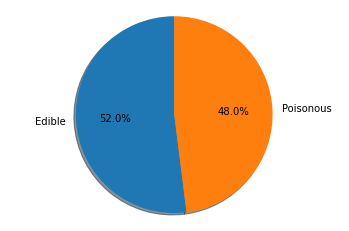

In [6]:
# Let's see how the predicted variable is distributed and whether the sample is balanced or not
classes_count = pd.DataFrame(df['classes'].value_counts())
classes_count.index = ['edible', 'poisonous']
classes_count = classes_count.reset_index().rename(columns = {'index': 'class'})

# Building a pie chart for the predicted variable (class)
labels = 'Edible', 'Poisonous'
sizes = [52, 48]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

print('We can see form below that the sample is quite balanceed and both classes are present in the data')
plt.show()

In [7]:
# Lets also check how the two classes are distributed among the main characteristic - cap color
# It is the foremost visible to a person feature of a mushroom

df_proc = df_preliminary_proc(mushrooms)
df_proc = df_proc.reset_index()[['classes', 'cap_color', 
                                 'index']].groupby(['cap_color', 
                                                    'classes']).count().reset_index().rename(columns =
                                                                                             {'index':
                                                                                              'count'})


df_edible = df_proc[df_proc['classes']=='edible']
df_poison = df_proc[df_proc['classes']=='poisonous']

# merge to get summary data, fillna with zero
df_e_p_counts = df_edible.drop(['classes'],axis=1).merge(df_poison.drop(['classes'],axis=1), 
                                                         on = 'cap_color', how = 'left', 
                                                         suffixes = ('_e', '_p')).fillna(0)

# change float to int
df_e_p_counts[['count_e', 'count_p']] = df_e_p_counts[['count_e', 'count_p']].astype(int)

df_e_p_counts['sum'] = df_e_p_counts['count_e'] + df_e_p_counts['count_p']
df_e_p_counts = df_e_p_counts.sort_values(by='sum', ascending = False)


Even though cap color might be percieved as the main feature of a mushroom, 
we see that there is no clear dependency of the cap color with the class of a mushroom. 
However, for some cap colors one o fthe classes prevail. 
Namely, those are yellow and red caps, with which the muchroomer should be careful.



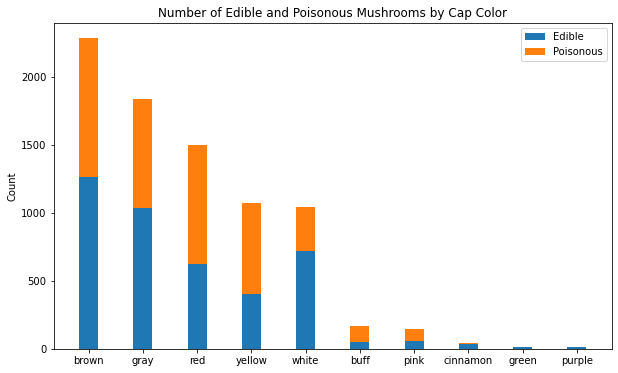

In [8]:
# Creating the bar chart
labels = df_e_p_counts['cap_color'].values.tolist()
edibles = df_e_p_counts['count_e'].values.tolist()
poisonous = df_e_p_counts['count_p'].values.tolist()

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(labels, edibles, width,  label='Edible')
ax.bar(labels, poisonous, width, bottom=edibles,label='Poisonous')

ax.set_ylabel('Count')
ax.set_title('Number of Edible and Poisonous Mushrooms by Cap Color')
ax.legend()

print('''
Even though cap color might be percieved as the main feature of a mushroom, 
we see that there is no clear dependency of the cap color with the class of a mushroom. 
However, for some cap colors one o fthe classes prevail. 
Namely, those are yellow and red caps, with which the muchroomer should be careful.
''')
plt.show()

### Little summary
To sum up, the data is quite clean, there are no missings and the sample is balanced, so we can be more sure that the prediction will not be skewed towards any class. There is a high a number of observations which is good for building predictions as it contributes to higher accuracy.  

## Modelling

In [9]:
# We split the data using 30-70 proportion with a random state to ensure same results
# Classes - is the predicted variable
# Other variables are taken as predictors

def data_splitting(df):

    # Split the data into train and test dfs:
    df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

    x_train = df_train.drop(['classes'], axis =1)  # take all variables except the price 
    y_train = df_train['classes']  # the price
    x_test = df_test.drop(['classes'], axis =1)  # take all variables except the price 
    y_test = df_test['classes']  # the price

    return x_train, y_train, x_test, y_test

In [10]:
# Apply splitting
x_train, y_train, x_test, y_test = data_splitting(df)

Accuracy on train data: 1.00
Accuracy on test data: 1.00
F1-score: 1.00
Kappa: 1.00


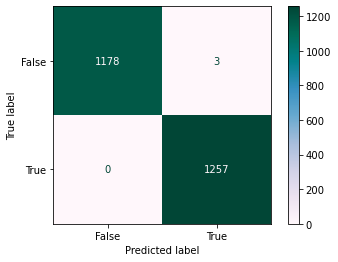

In [11]:
# Instantiate KNN learning model
# N is 6 as it gave the highest accuracy
model_knn = KNeighborsClassifier(n_neighbors=6)

# fit the model
model_knn.fit(x_train, y_train)

# Accuracy Score
accuracy_train = accuracy_score(y_train, model_knn.predict(x_train)) # for train
accuracy_test = accuracy_score(y_test, model_knn.predict(x_test))   # for test
f1_test = f1_score(y_test, model_knn.predict(x_test))
kappa = cohen_kappa_score(y_test, model_knn.predict(x_test))
print('Accuracy on train data: %.2f' %accuracy_train)
print('Accuracy on test data: %.2f' %accuracy_test)
print('F1-score: %.2f' %f1_test)
print('Kappa: %.2f' %kappa)
plot_confusion_matrix(model_knn, x_test, y_test, cmap = plt.cm.PuBuGn)
plt.show()

Accuracy on train data: 0.99
Accuracy on test data: 0.99
F1-score: 0.99
Kappa: 0.98


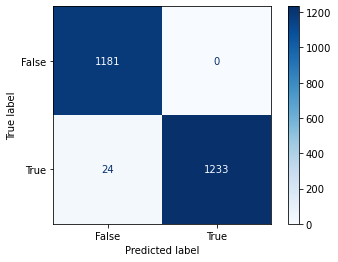

In [12]:
# Decision tree model:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=4)

# fit the model
model_tree.fit(x_train, y_train)

# Accuracy Score
accuracy_train = accuracy_score(y_train, model_tree.predict(x_train)) # for train
accuracy_test = accuracy_score(y_test, model_tree.predict(x_test))   # for test
f1_test = f1_score(y_test, model_tree.predict(x_test))
kappa = cohen_kappa_score(y_test, model_tree.predict(x_test))
print('Accuracy on train data: %.2f' %accuracy_train)
print('Accuracy on test data: %.2f' %accuracy_test)
print('F1-score: %.2f' %f1_test)
print('Kappa: %.2f' %kappa)
plot_confusion_matrix(model_tree, x_test, y_test, cmap = plt.cm.Blues)
plt.show()

Accuracy on train data: 1.00
Accuracy on test data: 1.00
F1-score: 1.00
Kappa: 1.00


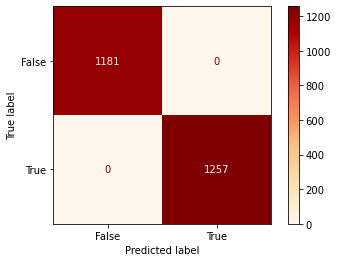

In [13]:
# Random forest:
model_rf = RandomForestClassifier(max_depth=8)

# fit the model
model_rf.fit(x_train, y_train)

# Accuracy Score
accuracy_train = accuracy_score(y_train, model_rf.predict(x_train)) # for train
accuracy_test = accuracy_score(y_test, model_rf.predict(x_test))   # for test
f1_test = f1_score(y_test, model_rf.predict(x_test))
kappa = cohen_kappa_score(y_test, model_rf.predict(x_test))
print('Accuracy on train data: %.2f' %accuracy_train)
print('Accuracy on test data: %.2f' %accuracy_test)
print('F1-score: %.2f' %f1_test)
print('Kappa: %.2f' %kappa)

plot_confusion_matrix(model_rf, x_test, y_test, cmap = plt.cm.OrRd)
plt.show()

### Little summary
All models give great accuracies and this could be a warning sign for overfitting. However, logic tells, that it might actually be possible to determine the class of a mushroom with a 100% accuracy, when so many features are taken into account. Thus, we just conclude that our model is actually trustworthy. For the app we will go with KNN, simply because it was the first one which gave such great results. It does not make sense to continue trying other ML techniques because the result higher that what we've already obtained, can not be achieved. 

## Making the app

See GitHub repo: https://github.com/dnkolzeev/mushROOM